In [1253]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn import mixture
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.stats.multitest
from enigmatoolbox.datasets import risk_genes

In [369]:

def clusters(df, algo):
    if (algo == 'GMM'):
        title = 'Gaussian Mixture Clustering'
        gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(df[thick])
        labels = gm.predict(df[thick])
        model_df = df.assign(Cluster = labels)
      
    

    elif (algo == 'AC'):
        title = 'Agglomerative Clustering'
        AC = AgglomerativeClustering(n_clusters=n_clusters).fit(df[thick])
        labels = AC.labels_
        model_df = df.assign(Cluster = labels)
        
    elif (algo == 'KM'):
        title = 'K-Means'
        kmeans = KMeans(n_clusters=n_clusters).fit(df[thick])
        labels = kmeans.labels_
        model_df = df.assign(Cluster = labels)

#     model_df.Cluster = model_df.Cluster.replace({0 : 7})    
    sns.set_theme(style="darkgrid",font_scale=1.5)
    sns.set_palette('Set3')
    c = sns.relplot(data=model_df, x="age_at_scan", 
                    y=df[thick].mean(axis = 1), hue=labels, 
                    palette = 'Set3',
                    height=6).set(xlabel = 'Age', ylabel = "Z-score", title = title)
    
#     model_df.Cluster = model_df.Cluster.replace({0 : 7})

    plt.show()
    return model_df

In [3]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

In [4]:
def find_K(Z_df_pred):
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 42,
    }
    # A list holds the SSE values for each k
    sse = []
    for k in range(2, 9):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(Z_df_pred)
        sse.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, 9), sse)
    plt.xticks(range(2, 9))
    plt.xlabel("k")
    plt.ylabel("SSE")
    plt.title('Sum Squared Error function of number of k')
    plt.show()

In [5]:
data_dir = '/Users/ltran/Documents/Data/'

### Import Z-Scores

TCA

In [144]:
Ztca = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_tca_rdb.csv'))

In [145]:
Ztca = Ztca[(Ztca.ASD == 'TCA_pr') | (Ztca.ASD == 'TCA_ac')  | (Ztca.ASD == 'TCA')]

In [146]:
Ztca_pr = Ztca[(Ztca.ASD == 'TCA_pr')]
Ztca_ac = Ztca[(Ztca.ASD == 'TCA_ac')]

ASD 

In [147]:
Zasd = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_asd_rdb.csv'))

In [148]:
Zasd = Zasd[Zasd.ASD == 'Yes']

## Import residuals

In [115]:
Zasd = pd.read_csv(os.path.join(data_dir, 'Outputs/resid_asd.csv'))
Zasd = Zasd[Zasd.ASD == 'Yes']

In [116]:
Ztca = pd.read_csv(os.path.join(data_dir, 'Outputs/resid_tca.csv'))
Ztca = Ztca[(Ztca.ASD == 'TCA_pr') | (Ztca.ASD == 'TCA_ac')  | (Ztca.ASD == 'TCA')]

In [135]:
Ztca.groupby(['Sex', 'ASD']).size()

Series([], dtype: int64)

### Define ROIs

In [149]:
thick = [col for col in Ztca.columns if 'thickness' in col]
# thick.pop(64)
# thick.pop(65)

## Clustering

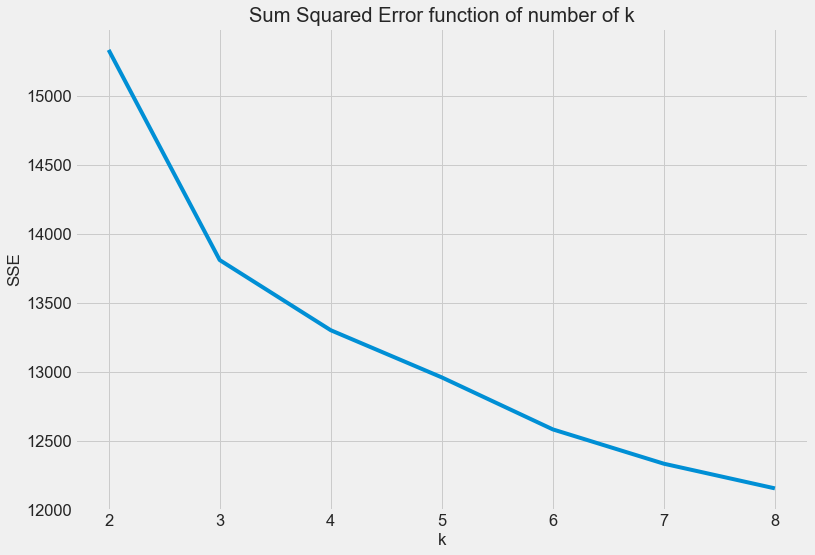

In [362]:
find_K(Zasd[thick])

In [363]:
n_clusters = 3

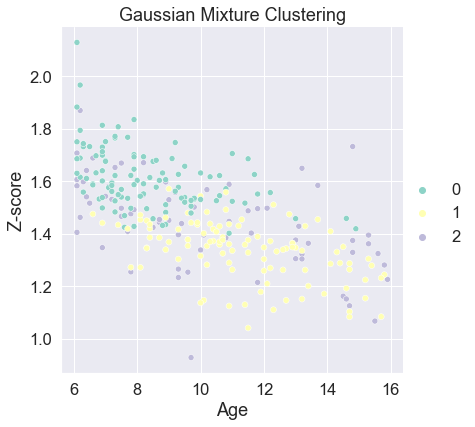

In [370]:
GMM_df = clusters(Zasd, 'GMM')

In [158]:
GMM_df.groupby('Cluster').ADOS_TOTComSoc.mean()

Cluster
0    12.405405
1    11.245283
2    15.708333
Name: ADOS_TOTComSoc, dtype: float64

In [172]:
GMM_df

,lh_bankssts_thickness_Z_predict,lh_caudalanteriorcingulate_thickness_Z_predict,lh_caudalmiddlefrontal_thickness_Z_predict,lh_cuneus_thickness_Z_predict,lh_entorhinal_thickness_Z_predict,lh_fusiform_thickness_Z_predict,lh_inferiorparietal_thickness_Z_predict,lh_inferiortemporal_thickness_Z_predict,lh_isthmuscingulate_thickness_Z_predict,lh_lateraloccipital_thickness_Z_predict,...,date_MRI,date_hospi,delta,Subject_y,Month,meanCT,totalSA,site,mean_ct,Cluster
0,-1.151841,-0.256445,1.573170,-0.223870,-1.877156,-1.788974,0.108894,-2.880721,0.589941,0.155823,...,NaN,NaN,NaN,NaN,NaN,2.707100,164403.0,INTERA,2.730441,2
1,-0.909879,-0.876738,-0.134058,0.111486,-0.143117,-2.028878,0.415218,0.174530,0.366905,-0.540997,...,NaN,NaN,NaN,NaN,NaN,2.662850,204535.0,INTERA,2.677926,2
2,-1.097232,-0.855674,1.338101,-1.185039,-2.202281,-2.619299,0.460566,0.039258,0.928195,-0.279454,...,NaN,NaN,NaN,NaN,NaN,2.716115,182781.0,INTERA,2.693662,2
3,-0.284632,0.265835,1.202177,0.175829,-2.267221,-2.279963,-0.267090,-3.404131,0.406218,-0.099334,...,NaN,NaN,NaN,NaN,NaN,2.729830,204106.0,INTERA,2.748309,2
4,-1.334231,0.213916,-0.436492,-0.477325,-2.361500,-2.012901,-0.110358,-3.063712,0.520498,1.302837,...,NaN,NaN,NaN,NaN,NaN,2.583240,187325.0,INTERA,2.567338,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.530789,-0.644767,-0.676727,1.122069,2.488826,1.736404,-0.500422,2.212934,-1.411789,0.492967,...,NaN,NaN,NaN,NaN,NaN,2.816745,175206.0,INGENIA,2.882632,0
285,0.212190,0.307483,-0.698089,-0.006731,1.220091,1.038572,-0.709239,0.555854,0.377869,-0.640694,...,NaN,NaN,NaN,NaN,NaN,2.691170,182621.0,INGENIA,2.778000,1
286,0.167802,0.799392,-1.240247,-0.807275,1.373238,1.499394,-1.005765,0.702023,0.883147,0.218999,...,NaN,NaN,NaN,NaN,NaN,2.625020,192351.0,INGENIA,2.713735,1
287,0.860645,-0.021029,0.052356,-1.049009,1.796018,3.622555,0.145067,1.491218,-1.427205,1.012056,...,NaN,NaN,NaN,NaN,NaN,2.810150,187304.0,INGENIA,2.867662,0


In [384]:
l = {}
for i in range(n_clusters):
    l.update({f'Cluster{i}' : GMM_df.loc[GMM_df.Cluster == i, scores_clinic].mean()})

In [385]:
t = pd.concat(l, axis = 1)

In [386]:
t = pd.melt(t)

In [387]:
t['Score'] = [
#     'ADI_R_NONVERBAL_TOTAL_BV', 'ADI_R_ONSET_TOTAL_D', 'ADI_R_RRB_TOTAL_C',
#        'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_TOT_B', 'ADOS_TOTC', 'ADOS_TOTCOM',
#        'ADOS_TOTComSoc', 'ADOS_TOTD', 'ADOS_TOTE', 'ADOS_TOTSoc'
 'IMT',
 'IQ_max',
 'IRF',

 'IVS',
 'IVT'
       
             ]*3

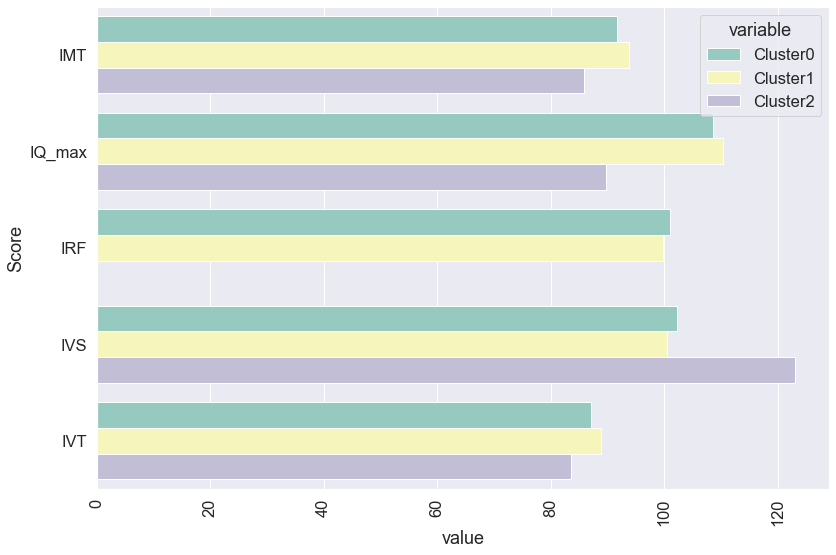

In [388]:
sns.set_palette('Set3')
sns.barplot(x= 'value', y = 'Score', hue = 'variable', data = t)
plt.xticks(rotation = 90)
plt.show()

In [297]:
score_df = pd.concat(l, axis = 1)

In [298]:
scores_df = pd.melt(score_df)

In [299]:
score_df['Score'] = score_df.index

In [257]:
pd.melt(score_df, id_vars = ['value_vars = ['Cluster0'])

,variable,value
0,Cluster0,10.727273
1,Cluster0,3.857143
2,Cluster0,5.916667
3,Cluster0,17.333333
4,Cluster0,15.75
...,...,...
59,Score,IMT
60,Score,IQ_max
61,Score,IRF
62,Score,IVS


In [270]:
scores_clinic

['ADI_R_NONVERBAL_TOTAL_BV',
 'ADI_R_ONSET_TOTAL_D',
 'ADI_R_RRB_TOTAL_C',
 'ADI_R_SOCIAL_TOTAL_A',
 'ADI_R_TOT_B',
 'ADOS_MODULE',
 'ADOS_TOTC',
 'ADOS_TOTCOM',
 'ADOS_TOTComSoc',
 'ADOS_TOTD',
 'ADOS_TOTE',
 'ADOS_TOTSoc',
 'IMT',
 'IQ_max',
 'IRF',
 'IVS',
 'IVT']

In [272]:
scores_df

,variable,value
0,Cluster0,10.727273
1,Cluster0,3.857143
2,Cluster0,5.916667
3,Cluster0,17.333333
4,Cluster0,15.750000
5,Cluster0,1.500000
6,Cluster0,6.800000
7,Cluster0,12.405405
8,Cluster0,3.212121
9,Cluster0,2.000000


In [271]:
scores_df['Scores'] = scores_clinic+scores_clinic+scores_clinic

ValueError: Length of values (51) does not match length of index (48)

<AxesSubplot:ylabel='value'>

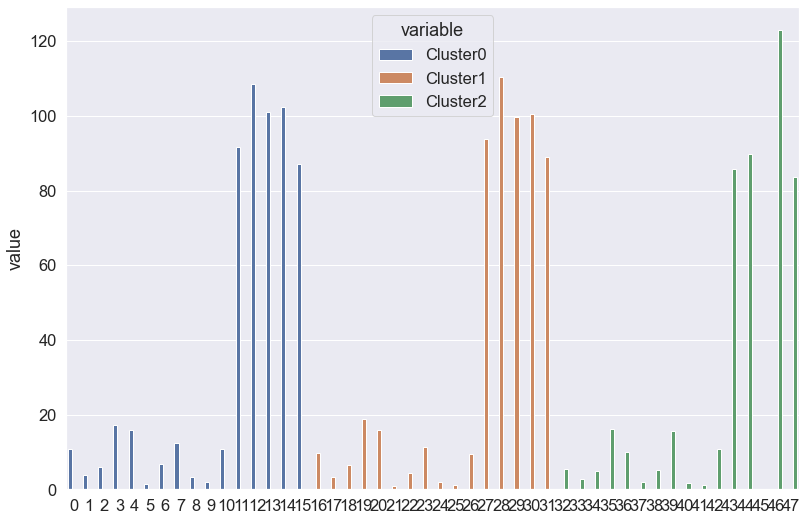

In [268]:
sns.barplot(x= scores_df.index, y = scores_df['value'], hue = scores_df['variable'])

In [264]:
for i in score_df.columns:
    print(i)
    sns.barplot( y = score_df['value'], hue = score_df['varibale'])
    plt.xticks(rotation = 90)

Cluster0


KeyError: 'Score'

In [379]:
scores_clinic = [
# 'ADI_R_NONVERBAL_TOTAL_BV',
#  'ADI_R_ONSET_TOTAL_D',
#  'ADI_R_RRB_TOTAL_C',
#  'ADI_R_SOCIAL_TOTAL_A',
#  'ADI_R_TOT_B',
#  'ADOS_MODULE',
#  'ADOS_TOTC',
#  'ADOS_TOTCOM',
#  'ADOS_TOTComSoc',
#  'ADOS_TOTD',
#  'ADOS_TOTE',
#  'ADOS_TOTSoc'
#                  , 

 'IMT',
 'IQ_max',
 'IRF',

 'IVS',
 'IVT'
                
                ]

In [169]:
GMM_df.ICV

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
284   NaN
285   NaN
286   NaN
287   NaN
288   NaN
Name: ICV, Length: 289, dtype: float64

In [173]:
GMM_df.loc[GMM_df.Cluster == 0, scores_clinic].mean()

ADI_R_NONVERBAL_TOTAL_BV     10.727273
ADI_R_ONSET_TOTAL_D           3.857143
ADI_R_RRB_TOTAL_C             5.916667
ADI_R_SOCIAL_TOTAL_A         17.333333
ADI_R_TOT_B                  15.750000
ADOS_TOTC                     1.500000
ADOS_TOTCOM                   6.800000
ADOS_TOTComSoc               12.405405
ADOS_TOTD                     3.212121
ADOS_TOTE                     2.000000
ADOS_TOTSoc                  10.833333
IMT                          91.629630
IQ_max                      108.593750
IRF                         101.043478
IVS                         102.304348
IVT                          87.178571
dtype: float64

## Compare clusters 

In [154]:
corr = {}
pvall = {}
for i in range(n_clusters):
    corr.update({f'Cluster{i}':stats.pearsonr(Ztca[thick].mean(), GMM_df.loc[GMM_df.Cluster == i, thick].mean())[0]})
    pvall.update({f'Cluster{i}':stats.pearsonr(Ztca[thick].mean(), GMM_df.loc[GMM_df.Cluster == i, thick].mean())[1]})

In [155]:
d = pd.DataFrame.from_dict({'Cluster' : GMM_df.loc[GMM_df.Cluster == 0, thick].mean(),
                            'TCA' :  Ztca[thick].mean()})

In [110]:
d['ROI'] = d.index

Pearson : (-0.04664039242143534, 0.7056671107145844)


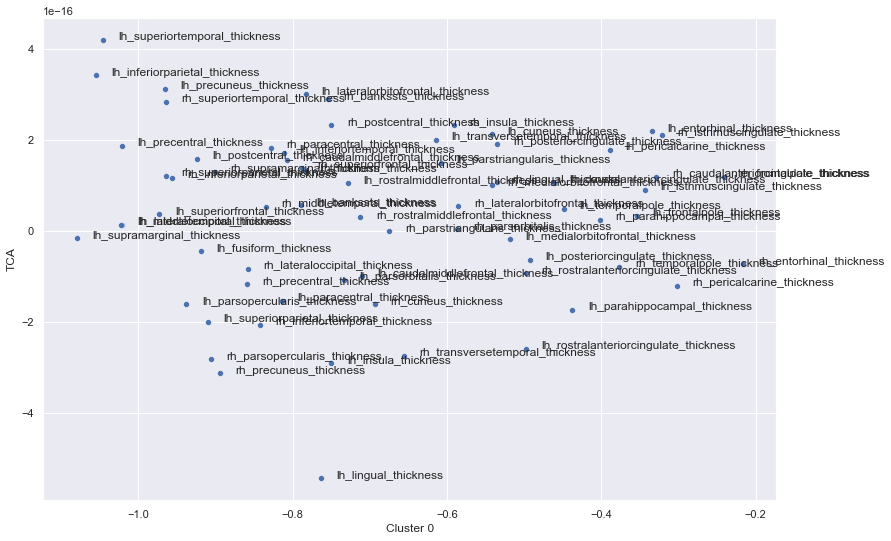

Pearson : (0.04744059078221051, 0.7008534258924319)


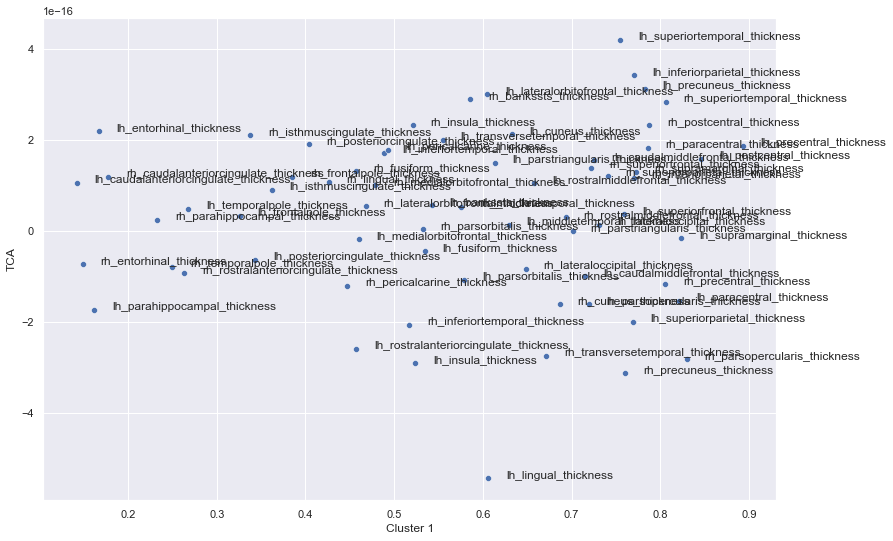

Pearson : (-0.020904480575092966, 0.8656351887387516)


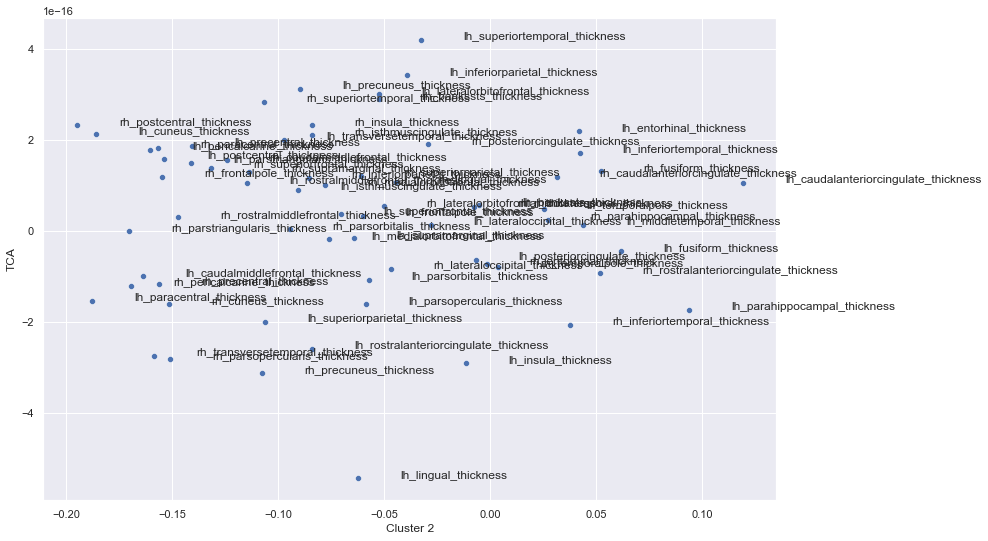

In [124]:

sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in range(n_clusters):
    d = pd.DataFrame.from_dict({'ASD' : GMM_df.loc[GMM_df.Cluster == i, thick].mean(),
                                'TCA' :  Ztca[thick].mean()})
    d['ROI'] = d.index
    sns.scatterplot(x = 'ASD', y = 'TCA', data = d)
    label_point(d.ASD, d.TCA, d.ROI.str.replace('_thickness_Z_predict', ''), plt.gca())
    print('Pearson :',stats.pearsonr(d['ASD'], d.TCA))
    plt.xlabel(f'Cluster {i}')
    plt.show()

In [57]:
GMM_df.groupby('Cluster').ADI_R_TOT_B.mean()

Cluster
0    17.000000
1    15.578947
2     9.983871
Name: ADI_R_TOT_B, dtype: float64

In [58]:
GMM_df['QI_TOTAL']

0      111.0
1        NaN
2      102.0
3        NaN
4       78.0
       ...  
284      NaN
285      NaN
286      NaN
287      NaN
288      NaN
Name: QI_TOTAL, Length: 289, dtype: float64

In [31]:
GMM_df.groupby(['Cluster']).size().to_frame('Count')

,Count
Cluster,
0,105
1,109
2,75


In [71]:

for i in range(n_clusters):
    print(GMM_df[GMM_df.Cluster == i].shape[0] -GMM_df[GMM_df.Cluster == i].ADI_R_RRB_TOTAL_C.isna().sum())

11
24
62


In [67]:
GMM_df[['ADI_R_NONVERBAL_TOTAL_BV',
 'ADI_R_ONSET_TOTAL_D',
 'ADI_R_RRB_TOTAL_C',
 'ADI_R_SOCIAL_TOTAL_A',
 'ADI_R_TOT_B',
 'ADOS_MODULE',
 'ADOS_TOTC',
 'ADOS_TOTCOM',
 'ADOS_TOTComSoc',
 'ADOS_TOTD',
 'ADOS_TOTE',
 'ADOS_TOTSoc']].isna().sum()

ADI_R_NONVERBAL_TOTAL_BV    194
ADI_R_ONSET_TOTAL_D         199
ADI_R_RRB_TOTAL_C           192
ADI_R_SOCIAL_TOTAL_A        192
ADI_R_TOT_B                 205
ADOS_MODULE                 213
ADOS_TOTC                   247
ADOS_TOTCOM                 239
ADOS_TOTComSoc              175
ADOS_TOTD                   184
ADOS_TOTE                   259
ADOS_TOTSoc                 238
dtype: int64

In [63]:
set(GMM_df.columns)

{'ADI_R_NONVERBAL_TOTAL_BV',
 'ADI_R_ONSET_TOTAL_D',
 'ADI_R_RRB_TOTAL_C',
 'ADI_R_SOCIAL_TOTAL_A',
 'ADI_R_TOT_B',
 'ADOS_MODULE',
 'ADOS_TOTC',
 'ADOS_TOTCOM',
 'ADOS_TOTComSoc',
 'ADOS_TOTD',
 'ADOS_TOTE',
 'ADOS_TOTSoc',
 'ASD',
 'BrainSeg',
 'BrainSegNotVent',
 'BrainSegVol',
 'BrainSegVolNotVent',
 'BrainSegVolNotVent_x',
 'BrainSegVolNotVent_x_x',
 'BrainSegVolNotVent_x_y',
 'BrainSegVolNotVent_y',
 'BrainSegVolNotVent_y_x',
 'BrainSegVolNotVent_y_y',
 'BrainSegVol_to_eTIV',
 'Brain_Stem',
 'CC_Anterior',
 'CC_Central',
 'CC_Mid_Anterior',
 'CC_Mid_Posterior',
 'CC_Posterior',
 'CGH_tabet',
 'COGNITIVE_LEVEL (1:normal; 2:borderline; 3:delay)',
 'CSF',
 'CerebralWhiteMatter',
 'CerebralWhiteMatterVol',
 'Cluster',
 'Code_C0733',
 'Code_DNA_RDB',
 'Code_Fusion_ADN',
 'Code_Josselin',
 'Code_MRI',
 'Code_PARIS',
 'Code_abide2',
 'Comments of qc_sub_september2013.jmp',
 'Control',
 'Cortex',
 'CortexVol',
 'DNA_tabet',
 'DateOfBirth',
 'Devlopmental Quotient',
 'EstimatedTotalIntraC

In [27]:
set(GMM_df.a)

,lh_bankssts_thickness_Z_predict,lh_caudalanteriorcingulate_thickness_Z_predict,lh_caudalmiddlefrontal_thickness_Z_predict,lh_cuneus_thickness_Z_predict,lh_entorhinal_thickness_Z_predict,lh_fusiform_thickness_Z_predict,lh_inferiorparietal_thickness_Z_predict,lh_inferiortemporal_thickness_Z_predict,lh_isthmuscingulate_thickness_Z_predict,lh_lateraloccipital_thickness_Z_predict,...,date_MRI,date_hospi,delta,Subject_y,Month,meanCT,totalSA,site,mean_ct,Cluster
0,-1.151841,-0.256445,1.573170,-0.223870,-1.877156,-1.788974,0.108894,-2.880721,0.589941,0.155823,...,NaN,NaN,NaN,NaN,NaN,2.707100,164403.0,INTERA,2.730441,2
1,-0.909879,-0.876738,-0.134058,0.111486,-0.143117,-2.028878,0.415218,0.174530,0.366905,-0.540997,...,NaN,NaN,NaN,NaN,NaN,2.662850,204535.0,INTERA,2.677926,2
2,-1.097232,-0.855674,1.338101,-1.185039,-2.202281,-2.619299,0.460566,0.039258,0.928195,-0.279454,...,NaN,NaN,NaN,NaN,NaN,2.716115,182781.0,INTERA,2.693662,2
3,-0.284632,0.265835,1.202177,0.175829,-2.267221,-2.279963,-0.267090,-3.404131,0.406218,-0.099334,...,NaN,NaN,NaN,NaN,NaN,2.729830,204106.0,INTERA,2.748309,2
4,-1.334231,0.213916,-0.436492,-0.477325,-2.361500,-2.012901,-0.110358,-3.063712,0.520498,1.302837,...,NaN,NaN,NaN,NaN,NaN,2.583240,187325.0,INTERA,2.567338,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.530789,-0.644767,-0.676727,1.122069,2.488826,1.736404,-0.500422,2.212934,-1.411789,0.492967,...,NaN,NaN,NaN,NaN,NaN,2.816745,175206.0,INGENIA,2.882632,0
285,0.212190,0.307483,-0.698089,-0.006731,1.220091,1.038572,-0.709239,0.555854,0.377869,-0.640694,...,NaN,NaN,NaN,NaN,NaN,2.691170,182621.0,INGENIA,2.778000,1
286,0.167802,0.799392,-1.240247,-0.807275,1.373238,1.499394,-1.005765,0.702023,0.883147,0.218999,...,NaN,NaN,NaN,NaN,NaN,2.625020,192351.0,INGENIA,2.713735,1
287,0.860645,-0.021029,0.052356,-1.049009,1.796018,3.622555,0.145067,1.491218,-1.427205,1.012056,...,NaN,NaN,NaN,NaN,NaN,2.810150,187304.0,INGENIA,2.867662,0


### Correlation between Z-Scores and genes

In [139]:
corr = {}
pvall = {}
for i in genes.columns:
    corr.update({i:stats.pearsonr(genes[i], Ztca[thick].mean())[0]})
    pvall.update({i:stats.pearsonr(genes[i], Ztca[thick].mean())[1]})



In [140]:
df2 = pd.DataFrame.from_dict(data  = pvall, orient = 'index', columns=['Pval'])

In [141]:
df2['adj_p'] =  statsmodels.stats.multitest.multipletests(df2['Pval'], alpha = 0.05, method = 'bonferroni')[0]

In [142]:
df1 = pd.DataFrame.from_dict(data  = corr, orient = 'index', columns=['Correlation'])

In [143]:
df1 = df1.join(df2)

In [144]:
df1 = df1.reset_index().rename(columns={'index':'gene_name'})

In [145]:
df1[(df1.Correlation > 0.25) & (df1.adj_p)].shape[0]

9

In [ ]:
set(GMM_df.ADI_R_TOT_B)

In [1454]:
# df1 = df1[df1.gene_name.isin(rgenes)]

### Bootstrapping

In [161]:
corr = {}
pvall = []
temp = genes.sample(n = 175, axis = 'columns')
for i in temp.columns:
    corr.update({i : stats.pearsonr(temp[i], Ztca[thick].mean())[0]})
    pvall.append(stats.pearsonr(temp[i], Ztca[thick].mean())[1])
    
adp = statsmodels.stats.multitest.multipletests(pvall, alpha = 0.05, method = 'bonferroni')[0]

In [181]:

ctn = 0 
mean_c = []
for i in range(500):
    temp = genes.sample(n = 175, axis = 'columns')
    corr = {}
    pvall = []

    for i in temp.columns:
        corr.update({i : stats.pearsonr(temp[i], Ztca[thick].mean())[0]})
        pvall.append(stats.pearsonr(temp[i], Ztca[thick].mean())[1])
        
    
    w = pd.DataFrame.from_dict(data = corr, orient = 'index', columns = ['r'])
    w['adj_p'] =  statsmodels.stats.multitest.multipletests(pvall, alpha = 0.05, method = 'bonferroni')[0]
    mean_c.append(w[(w.r > 0.25) & (w.adj_p)].shape[0])
    if (w[(w.r > 0.25) & (w.adj_p)].shape[0] > 8):
        
        
        ctn += 1 

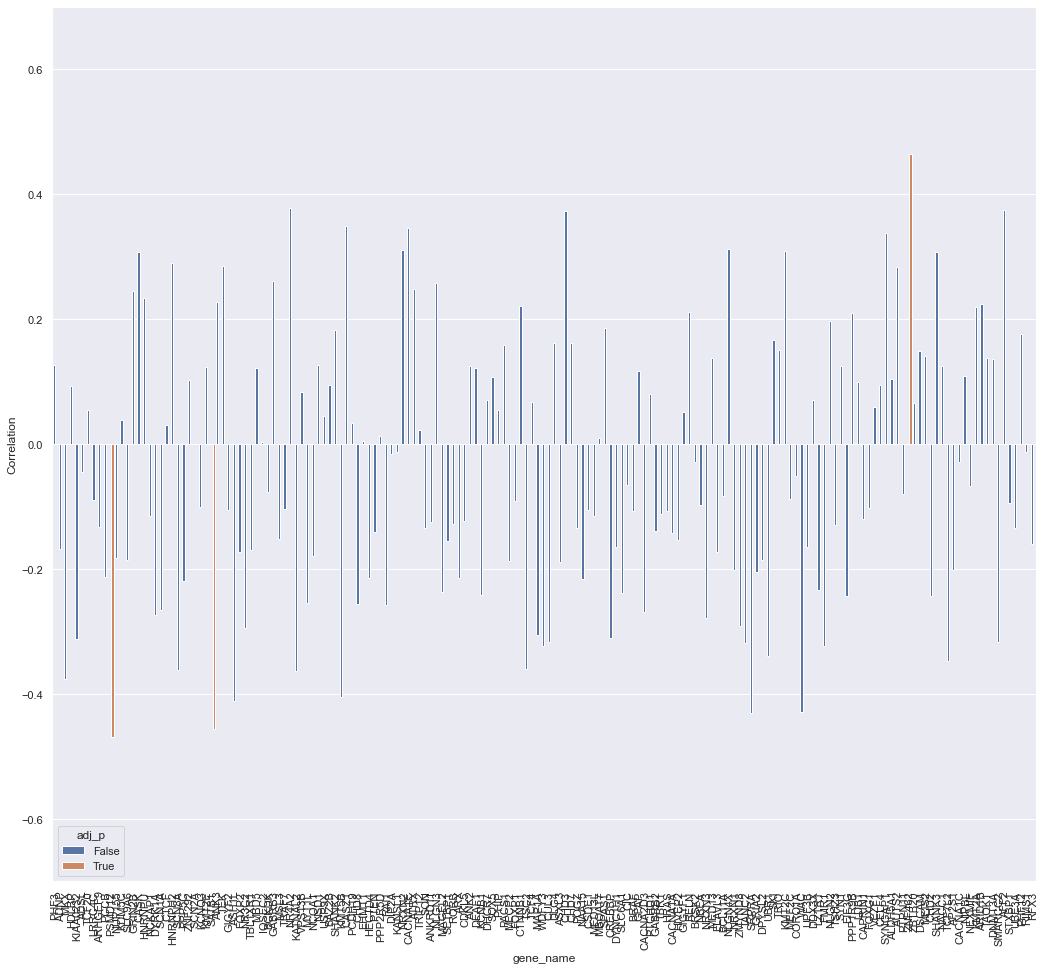

In [1456]:
sns.set(rc={'figure.figsize':(15.7,15)})
sns.barplot(x = 'gene_name', y = 'Correlation', data = df1, hue = 'adj_p')
plt.xticks(rotation = 90 )
plt.ylim(-0.7, 0.7)

plt.show()

Compute mean Z-Scores for each cluster

In [1406]:

c_meanZ = []
for i in range(n_clusters):
    c_meanZ.append(GMM_df.loc[GMM_df.Cluster == i, thick].mean())

Compute correlation between gene profiles and mean Z scores of clusters

In [1407]:
mega_corr = {}
mega_pv = {}
for j in range(n_clusters):
    corr = []
    pvall = []
    for i in genes:
        corr.append(stats.pearsonr(genes[i], c_meanZ[j])[0])
        pvall.append(stats.pearsonr(genes[i], c_meanZ[j])[1])
        
    mega_corr.update({j : corr})
    mega_pv.update({j : pvall})
    
    

In [1408]:
df_pv = pd.DataFrame.from_dict(mega_pv)
df_pv['gene_name'] = genes.columns
df_pv = df_pv.rename(columns= {0: 'P0', 1 : 'P1' , 2 : 'P2'})
for i in ['P0', 'P1', 'P2']:
    df_pv[f'adj_p-{i}'] = statsmodels.stats.multitest.multipletests(df_pv[i], alpha = 0.05, method = 'bonferroni')[0]

In [1409]:
df_corr = pd.DataFrame.from_dict(mega_corr)
df_corr['gene_name'] = genes.columns
df_corr = df_corr.rename(columns= {0: 'C0', 1 : 'C1' , 2 : 'C2'})

In [1410]:
df_corr_pv = df_pv.merge(df_corr, on = 'gene_name')

In [1412]:
d0 = df_corr_pv[['C0', 'gene_name', 'adj_p-P0']]
# d0['Rank'] = range(len(d0))

d1 = df_corr_pv[['C1', 'gene_name', 'adj_p-P1']]
# d1['Rank'] = range(len(d1))

d2 = df_corr_pv[['C2', 'gene_name', 'adj_p-P2']]
# d2['Rank'] = range(len(d2))

In [1413]:
d0.nlargest(10, 'C0')

,C0,gene_name,adj_p-P0
10,0.592766,PSMD12,True
133,0.553076,WAC,True
124,0.528811,SRPRA,True
22,0.473111,SCN8A,True
141,0.467544,EIF3G,True
43,0.412293,KATNAL2,False
84,0.408215,TSC2,False
2,0.387845,MKX,False
9,0.356685,PCCB,False
4,0.348891,KIAA0232,False


In [1414]:
d1.nlargest(10, 'C1')

,C1,gene_name,adj_p-P1
91,0.536791,CHD3,True
152,0.532054,ZNF462,True
63,0.485461,CACNA1E,True
169,0.480666,AFF2,True
42,0.459118,NR4A2,True
15,0.452687,CASK,True
62,0.442439,NRXN2,True
30,0.431384,TEK,False
148,0.424605,SYNGAP1,False
14,0.413352,GRIN2B,False


In [1415]:
d2.nlargest(10, 'C2')

,C2,gene_name,adj_p-P2
152,0.380963,ZNF462,False
120,0.365076,NLGN4X,False
42,0.340760,NR4A2,False
148,0.338127,SYNGAP1,False
157,0.336602,SHANK3,False
169,0.335744,AFF2,False
52,0.332532,CASZ1,False
63,0.316274,CACNA1E,False
150,0.307839,AUTS2,False
130,0.305828,KMT2C,False


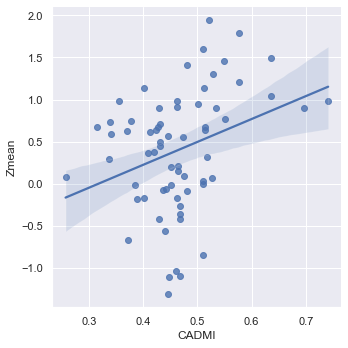

In [1426]:
dcad = pd.DataFrame({'CADMI' : genes['CACNA1E'], 'Zmean' : list(GMM_df.loc[GMM_df.Cluster == 2, thick].mean())})
sns.lmplot(y = 'Zmean', x = 'CADMI', data = dcad)

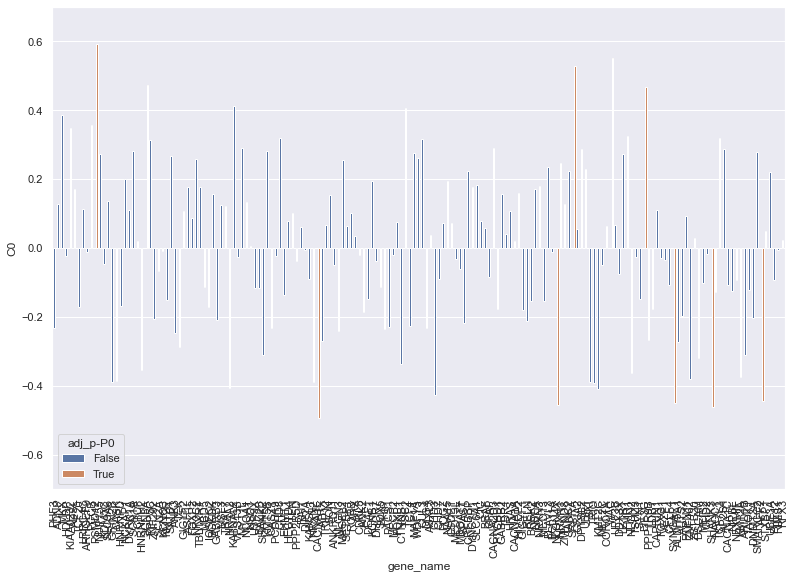

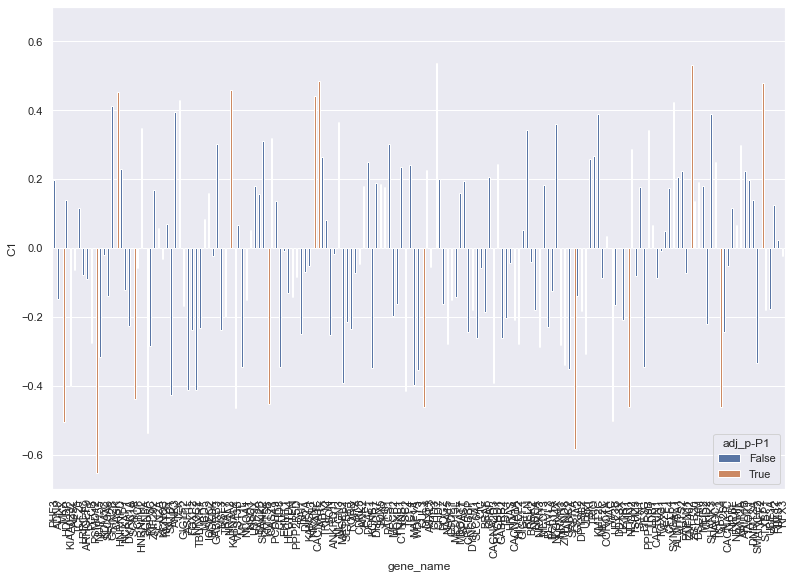

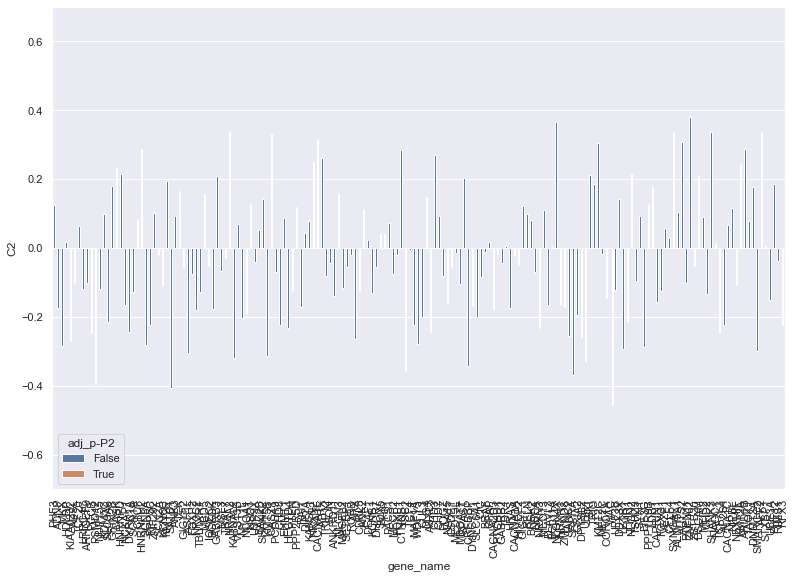

In [1417]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'gene_name', y = 'C0', data = d0, hue = 'adj_p-P0')
plt.xticks(rotation = 90 )
plt.ylim(-0.7, 0.7)

plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'gene_name', y = 'C1', data = d1, hue = 'adj_p-P1')
plt.xticks(rotation = 90 )
plt.ylim(-0.7, 0.7)

plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'gene_name', y = 'C2', data = d2, hue = 'adj_p-P2')
plt.xticks(rotation = 90 )
plt.ylim(-0.7, 0.7)

plt.show()

In [1101]:
rgenes = risk_genes('asd')

In [913]:
gentrek[gentrek.symbol.isin(rgenes)]

,ncbiID,ensemblID,hgncID,mimID,symbol,geneType,inheritanceType,hg19.chr,hg19.start,hg19.end,...,lofCon.pValue,lofCon.pValueCI5,lofCon.pValueCI95,lofAsd.AFcase,lofAsd.AFctrl,lofAsd.ACcase,lofAsd.AutismOR,lofAsd.pValue,lofAsd.pValueCI5,lofAsd.pValueCI95


### Import genes

In [72]:
gentrek = pd.read_csv(os.path.join(data_dir, 'Genet/genetrek-data-v7-2022-10-28.tsv'), sep = '\t')

/var/folders/p5/qymxnxk12156bhtw2jlf3sb40000gr/T/ipykernel_79283/4157899866.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  gentrek = pd.read_csv(os.path.join(data_dir, 'Genet/genetrek-data-v7-2022-10-28.tsv'), sep = '\t')


In [73]:
gentrek = gentrek[gentrek['curatedLists.sfari1']]

In [83]:
ano = pd.read_csv(os.path.join(data_dir, 'TCA_vol/gwas_ano.csv'))

In [172]:
genes = pd.read_csv(os.path.join(data_dir, 'TCA_vol/genes_desikan.csv'))

In [173]:
genes = pd.read_csv(os.path.join(data_dir, 'TCA_vol/genes_desikan.csv'))
genes = genes.drop(columns=['Unnamed: 0', 'label'])
genes = genes.loc[:67,]
# genes = genes.replace(np.nan , 0)

In [174]:
genes = genes.dropna()

In [127]:
genes = genes[(set(genes.columns) & set(gentrek.symbol))]

In [ ]:
curatedLists.highConfidenceNddV2

In [910]:
rgenes.a

{'APOPT1',
 'BAG5',
 'BEND4',
 'C8orf74',
 'CADPS',
 'CKB',
 'DCAF4L1',
 'FEZF2',
 'KCNN2',
 'KIZ',
 'KLC1',
 'KMT2E',
 'MACROD2',
 'MARK3',
 'MMS22L',
 'MROH5',
 'NEGR1',
 'NKX2-2',
 'NKX2-4',
 'NUDT12',
 'PINX1',
 'POU3F2',
 'PTBP2',
 'SLC30A9',
 'SOX7',
 'SRPK2',
 'TMEM33',
 'TRMT61A',
 'XRCC3',
 'XRN2'}

In [842]:
rgenes = ano.genes_ano

In [843]:
r0 = d0[d0.gene_name.isin(rgenes)]
r1 = d1[d1.gene_name.isin(rgenes)]
r2 = d2[d2.gene_name.isin(rgenes)]

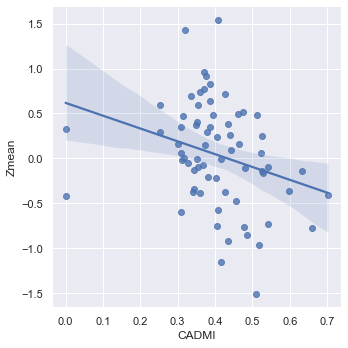

In [1141]:
dcad = pd.DataFrame({'CADMI' : genes['CASK'], 'Zmean' : list(GMM_df.loc[GMM_df.Cluster == 0, thick].mean())})
sns.lmplot(y = 'Zmean', x = 'CADMI', data = dcad)

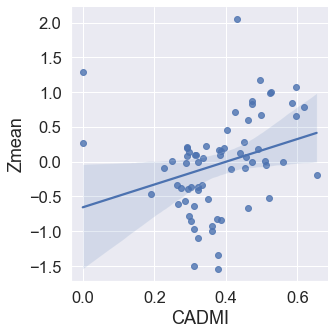

In [860]:
dcad = pd.DataFrame({'CADMI' : genes['CADM1'], 'Zmean' : list(GMM_df.loc[GMM_df.Cluster == 0, thick].mean())})
sns.lmplot(y = 'Zmean', x = 'CADMI', data = dcad)

In [859]:
list(GMM_df.loc[GMM_df.Cluster == 0, thick].mean())

lh_bankssts_thickness_Z_predict                   0.056233
lh_caudalanteriorcingulate_thickness_Z_predict    0.006112
lh_caudalmiddlefrontal_thickness_Z_predict       -0.778999
lh_cuneus_thickness_Z_predict                    -0.368924
lh_entorhinal_thickness_Z_predict                 0.987562
                                                    ...   
rh_supramarginal_thickness_Z_predict             -1.002028
rh_frontalpole_thickness_Z_predict                0.262653
rh_temporalpole_thickness_Z_predict               1.292950
rh_transversetemporal_thickness_Z_predict        -0.004058
rh_insula_thickness_Z_predict                     0.835173
Length: 68, dtype: float64

In [847]:
genes['CADM1']

0     0.336486
1     0.509377
2     0.298239
3     0.303493
4     0.522217
        ...   
63    0.361326
64    0.000000
65    0.000000
66    0.558429
67    0.471995
Name: CADM1, Length: 68, dtype: float64

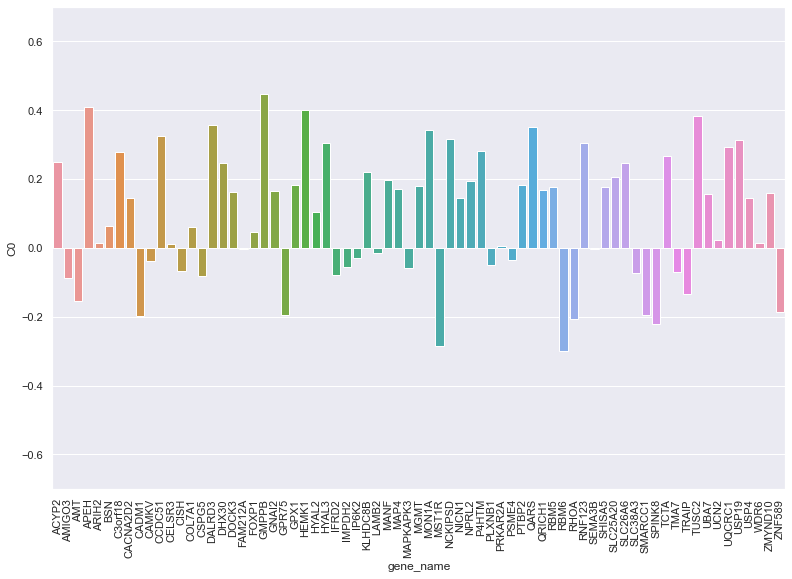

In [757]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'gene_name', y = 'C0', data = r0)
plt.xticks(rotation = 90 )
plt.ylim(-0.7, 0.7)

plt.show()

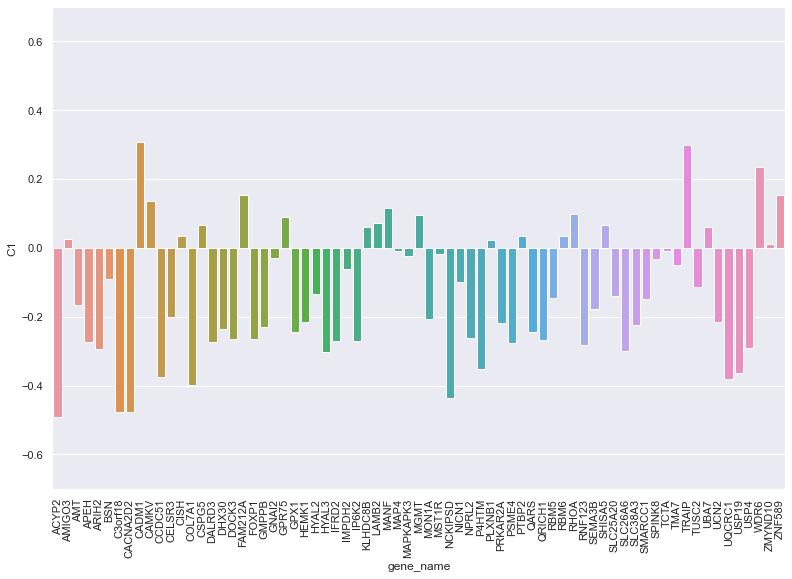

In [758]:
sns.barplot(x = 'gene_name', y = 'C1', data = r1)
plt.xticks(rotation = 90 )
plt.ylim(-0.7, 0.7)

plt.show()

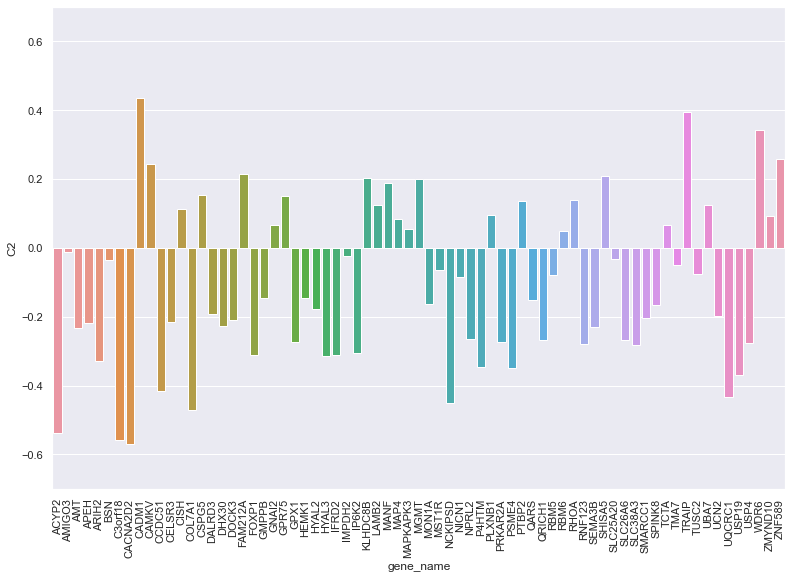

In [759]:
sns.barplot(x = 'gene_name', y = 'C2', data = r2)
plt.xticks(rotation = 90 )
plt.ylim(-0.7, 0.7)

plt.show()

In [719]:
gene_2asd= r2['gene_name']

In [460]:
df_corr

,0,1,2,gene_name
0,0.043146,0.276083,0.314104,A1BG
1,0.198068,-0.061378,-0.122205,A1BG-AS1
2,0.139701,-0.377931,-0.473936,AAAS
3,0.254331,-0.181646,-0.194601,AACS
4,-0.029001,-0.038509,0.078469,AADACL3
...,...,...,...,...
12663,-0.091149,-0.061342,0.020892,ZXDC
12664,0.168706,-0.156867,-0.195206,ZYG11B
12665,0.230382,-0.481921,-0.624882,ZYX
12666,-0.193359,-0.204499,-0.345869,ZZEF1


In [461]:
for i in range(n_clusters):
    print(df_corr.loc[df_corr[i].nlargest(n = 10).index, ]['gene_name'])

5540            LCP2
2478           CTXN3
400           AMDHD1
5568          LGALS1
2698         DENND2D
4309            GPX3
3973             GAL
761            ASGR2
4278           GPR20
5759    LOC100128239
Name: gene_name, dtype: object
7254      NR2F2
5258      KCTD4
7587      PALMD
647     ARHGAP6
4930       IL1B
9462      SCN9A
4922    IL13RA2
2855    DNAJC12
7649       PBX4
5192      KCNE4
Name: gene_name, dtype: object
647      ARHGAP6
9462       SCN9A
7587       PALMD
4922     IL13RA2
375       ALKAL2
9761         SLA
4930        IL1B
226        ADIRF
5258       KCTD4
639     ARHGAP36
Name: gene_name, dtype: object


In [463]:
for i in range(n_clusters):
    print(i, (set(df_corr.loc[df_corr[i].nlargest(n = 200).index, ]['gene_name']) & set(ano.genes_ano)))

0 {'GMPPB'}
1 {'TRAIP', 'CADM1'}
2 {'CADM1'}
